In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data analysing
df = pd.read_csv('kidney_disease.csv')
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.drop(columns='id', axis=1, inplace=True)
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [5]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
# data preprocessing
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white blood_cell_count', 'red blood_cell_count', 
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 
              'anomia', 'class']

In [7]:
df.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white blood_cell_count,red blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anomia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [8]:
# convert this columns data-type from object to float which are wrongly intrepreted
txt_cols = ['packed_cell_volume', 'white blood_cell_count','red blood_cell_count']

for col in txt_cols:
    print(f'{col} : {df[col].dtype}')

packed_cell_volume : object
white blood_cell_count : object
red blood_cell_count : object


In [9]:
for col in txt_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f'{col} : {df[col].dtype}')

packed_cell_volume : float64
white blood_cell_count : float64
red blood_cell_count : float64


In [10]:
# handling missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

red_blood_cells            152
red blood_cell_count       131
white blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anomia                       1
dtype: int64

In [11]:
def mean_val_imputation(df: pd.DataFrame, col: str) -> None:
    mean_val = df[col].mean()
    df[col].fillna(value=mean_val, inplace=True)
    
def mode_val_imputation(df: pd.DataFrame, col: str) -> None:
    mode_val = df[col].mode()[0]
    df[col].fillna(value=mode_val, inplace=True)

In [12]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in numeric_cols:
    mean_val_imputation(df, col)
    
non_numeric_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in non_numeric_cols:
    mode_val_imputation(df, col)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

C:\Users\Hari prasath\AppData\Local\Temp\ipykernel_24448\3417812683.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=mean_val, inplace=True)
C:\Users\Hari prasath\AppData\Local\Temp\ipykernel_24448\3417812683.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [13]:
# correct wrong catogries by replacing them to correct catogry
print(f'diabetes_mellitus: {df['diabetes_mellitus'].unique()}')
print(f'coronary_artery_disease: {df['coronary_artery_disease'].unique()}')
print(f'class: {df['class'].unique()}')

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
class: ['ckd' 'ckd\t' 'notckd']


In [14]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={' yes': 'yes', '\tyes': 'yes','\tno': 'no' })
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace={'\tno': 'no'})
df['class'] = df['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
print(f'diabetes_mellitus: {df['diabetes_mellitus'].unique()}')
print(f'coronary_artery_disease: {df['coronary_artery_disease'].unique()}')
print(f'class: {df['class'].unique()}')

diabetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
class: ['ckd' 'not ckd']


In [16]:
catogrical_col = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'appetite', 'hypertension',
                  'diabetes_mellitus', 'coronary_artery_disease', 'peda_edema', 'anomia', 'class']

for col in catogrical_col:
    print(f'{col}: {df[col].unique()}')


red_blood_cells: ['normal' 'abnormal']
pus_cell: ['normal' 'abnormal']
pus_cell_clumps: ['notpresent' 'present']
bacteria: ['notpresent' 'present']
appetite: ['good' 'poor']
hypertension: ['yes' 'no']
diabetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
peda_edema: ['no' 'yes']
anomia: ['no' 'yes']
class: ['ckd' 'not ckd']


In [17]:
# feature encoding (converting catogrical column to numeric column)
# here only 2 catogry so map yes -> 1 and no -> 0 simple
df['red_blood_cells'] = df['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
df['pus_cell'] = df['pus_cell'].map({'normal': 1, 'abnormal': 0})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df['bacteria'] = df['bacteria'].map({'present': 1, 'notpresent': 0})
df['appetite'] = df['appetite'].map({'good': 1, 'poor': 0})
df['hypertension'] = df['hypertension'].map({'yes': 1, 'no': 0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'yes': 1, 'no': 0})
df['peda_edema'] = df['peda_edema'].map({'yes': 1, 'no': 0})
df['anomia'] = df['anomia'].map({'yes': 1, 'no': 0})
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})

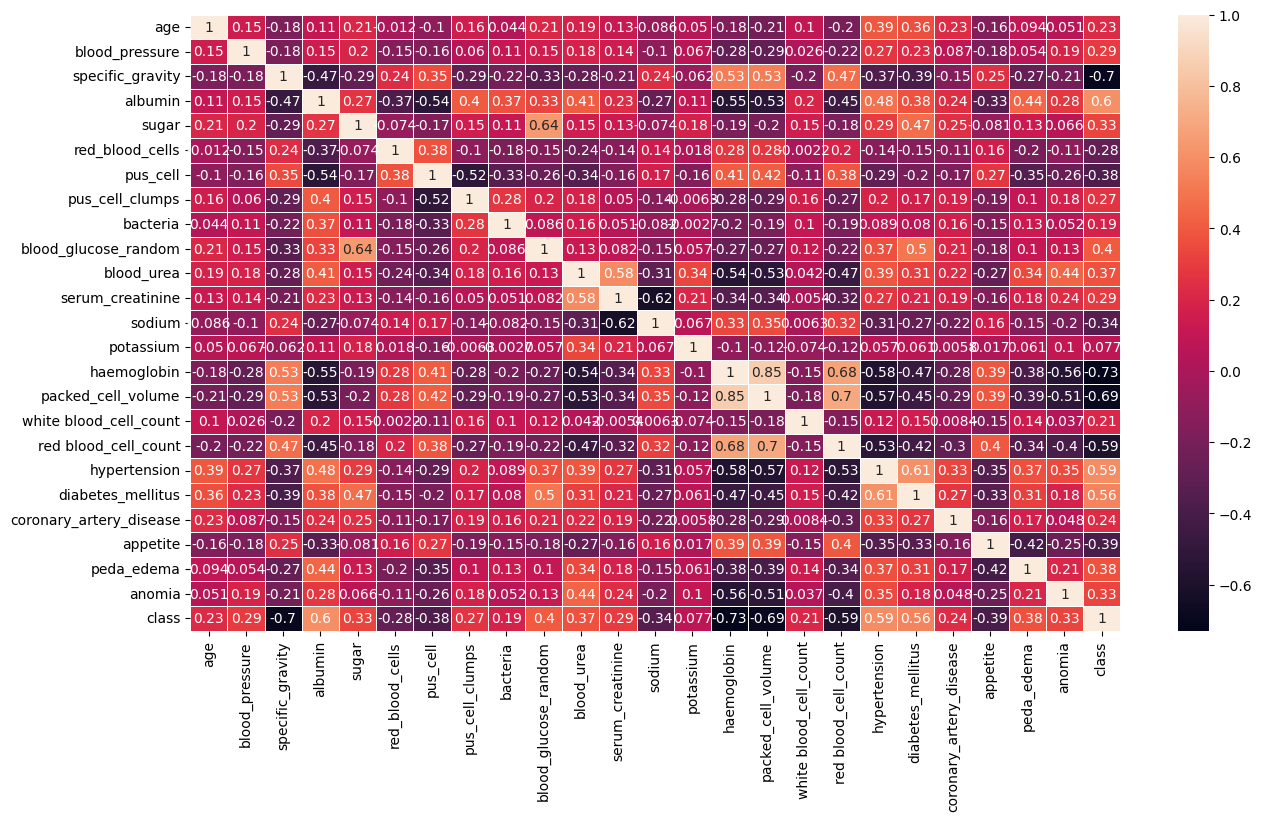

In [18]:
# data visualising
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()

In [19]:
class_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
class_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anomia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [20]:
df['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [21]:
# training the model
from sklearn.model_selection import train_test_split

features = df.drop('class', axis=1)
result = df['class']

features_train, features_test, result_train, result_test = train_test_split(features, result, test_size=0.25, random_state=25)

print(f'Features train data shape: {features_train.shape}')
print(f'Features test data shape: {features_test.shape}')

Features train data shape: (300, 24)
Features test data shape: (100, 24)


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [23]:
models = [
    ('Gaussian Native Bayes', GaussianNB()),
    ('K Neighbors', KNeighborsClassifier(n_neighbors=8)),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC(kernel='linear'))
]

In [24]:
# result evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, model):
    print(f'Evaluation of {name}', end='\n')
    model.fit(features_train, result_train)
    result_predict = model.predict(features_test)
    print(f'Confusion matrix: {confusion_matrix(result_test, result_predict)}', end='\n')
    print(f'Accuracy: {accuracy_score(result_test, result_predict) * 100}%', end='\n')
    print(f'Precision: {precision_score(result_test, result_predict)}', end='\n')
    print(f'Recall: {recall_score(result_test, result_predict)}', end='\n')
    print(f'F1 score: {f1_score(result_test, result_predict)}', end='\n')
    print('-' * 40, end='\n\n')

In [25]:
for name, model in models:
    evaluate_model(name, model)

Evaluation of Gaussian Native Bayes
Confusion matrix: [[37  0]
 [ 5 58]]
Accuracy: 95.0%
Precision: 1.0
Recall: 0.9206349206349206
F1 score: 0.9586776859504132
----------------------------------------

Evaluation of K Neighbors
Confusion matrix: [[31  6]
 [18 45]]
Accuracy: 76.0%
Precision: 0.8823529411764706
Recall: 0.7142857142857143
F1 score: 0.7894736842105263
----------------------------------------

Evaluation of Random Forest
Confusion matrix: [[35  2]
 [ 1 62]]
Accuracy: 97.0%
Precision: 0.96875
Recall: 0.9841269841269841
F1 score: 0.9763779527559056
----------------------------------------

Evaluation of Decision Tree
Confusion matrix: [[35  2]
 [ 3 60]]
Accuracy: 95.0%
Precision: 0.967741935483871
Recall: 0.9523809523809523
F1 score: 0.96
----------------------------------------

Evaluation of Support Vector Machine
Confusion matrix: [[34  3]
 [ 2 61]]
Accuracy: 95.0%
Precision: 0.953125
Recall: 0.9682539682539683
F1 score: 0.9606299212598425
---------------------------------

In [26]:
#manual input
user_input = pd.DataFrame([
    {
        'age': 48.0,
        'blood_pressure': 70.0,
        'specific_gravity': 1.0005,
        'albumin': 4.0,
        'sugar': 0.0,
        'red_blood_cells': 1,
        'pus_cell': 0,
        'pus_cell_clumps': 1,
        'bacteria': 0,
        'blood_glucose_random': 117.0,
        'blood_urea': 56.0,
        'serum_creatinine': 3.8,
        'sodium': 111.0,
        'potassium': 2.5,
        'haemoglobin': 11.2,
        'packed_cell_volume': 32,
        'white blood_cell_count': 6700.0,
        'red blood_cell_count': 3.9,
        'hypertension': 1,
        'diabetes_mellitus': 0,
        'coronary_artery_disease': 0,
        'appetite': 0,
        'peda_edema': 1,
        'anomia': 1
    },
    {
        'age': 45,
        'blood_pressure': 80.0,
        'specific_gravity': 1.025,
        'albumin': 0,
        'sugar': 0,
        'red_blood_cells': 1,
        'pus_cell': 1,
        'pus_cell_clumps': 0,
        'bacteria': 0,
        'blood_glucose_random': 82.0,
        'blood_urea': 49.0,
        'serum_creatinine': 0.6,
        'sodium': 147.0,
        'potassium': 4.4,
        'haemoglobin': 15.9,
        'packed_cell_volume': 46.0,
        'white blood_cell_count': 9100.0,
        'red blood_cell_count': 4.7,
        'hypertension': 0,
        'diabetes_mellitus': 0,
        'coronary_artery_disease': 0,
        'appetite': 1,
        'peda_edema': 0,
        'anomia': 0
    }
])

In [27]:
def predict_ckd(model, input_data):
    predictions = model.predict(input_data)
    return ['CKD' if p == 1 else 'Not CKD' for p in predictions]

results = predict_ckd(models[2][1], user_input)
print(results)

['CKD', 'Not CKD']
